# Новый раздел

   N                 Должность Язык.программирования Специализация  \
0  1        Junior QA engineer                   NaN     Manual QA   
1  2        Junior QA engineer                   NaN     Manual QA   
2  3         Software Engineer               C#/.NET           NaN   
3  4         Software Engineer            JavaScript           NaN   
4  5  Senior Software Engineer            JavaScript           NaN   

  Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
0               0.5                          0.5               400   
1  меньше 3 месяцев             меньше 3 месяцев               430   
2                 4                            1              2500   
3                 5                            4              2000   
4    10 и более лет                          0.5              4500   

   Изменение.зарплаты.за.12.месяцев    Город     Размер.компании  ...  \
0                                 0  Харьков       до 10 человек  ...   
1           

<ipython-input-3-0437271815eb>:71: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data_cleaned_with_avg = grouped_data.apply(fill_avg_salary)


count    4854.000000
mean     1883.371034
std      1056.802546
min       457.000000
25%       605.658594
50%      1678.630074
75%      3243.200926
max      7000.000000
Name: avg, dtype: float64


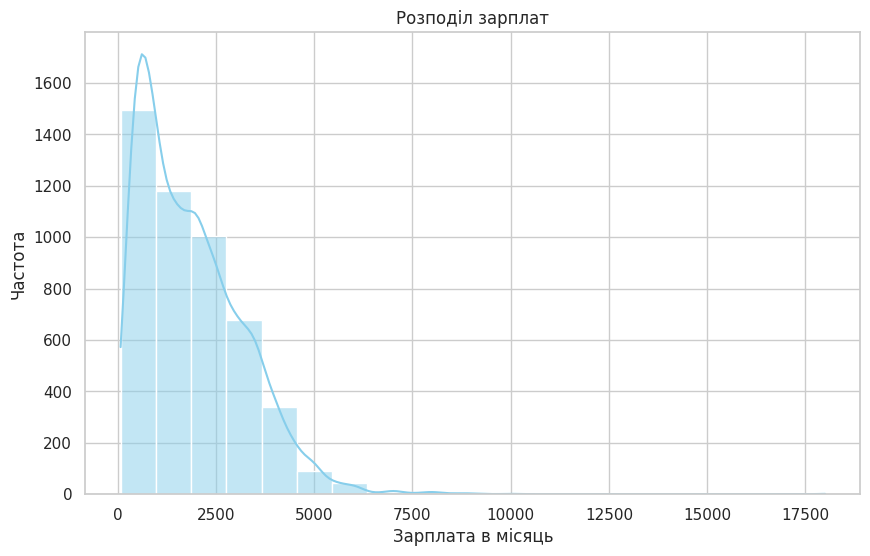

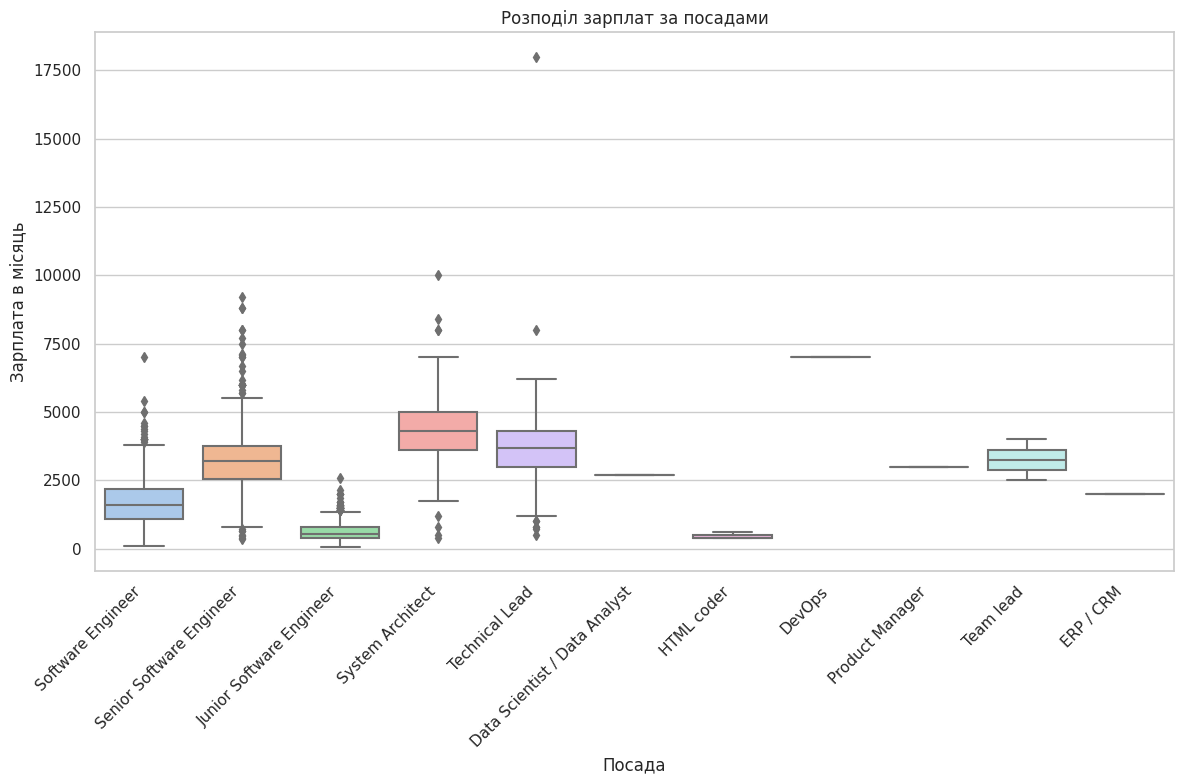

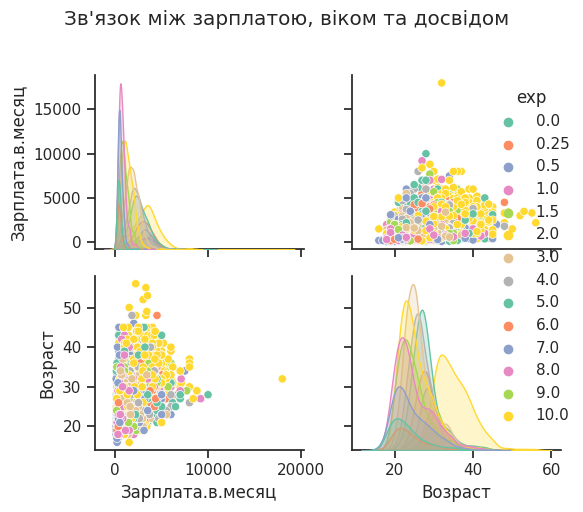

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File ID obtained from the Google Drive sharing link
file_id = '1JMYqXipZpz9Y5-vyxvLEO2Y1sRBxqu-U'
url = f'https://drive.google.com/uc?id={file_id}'

# Reading the CSV file
data = pd.read_csv(url)


# # Прочитати файл
# data = pd.read_csv('2017_jun_final.csv')

# Вивести перші декілька рядків
print(data.head())

# Розмір таблиці
print("Розмір таблиці:", data.shape)

# Типи стовпців
print("Типи стовпців:")
print(data.dtypes)

# Частка пропусків у кожному стовпці
missing_percentages = data.isnull().sum() / len(data) * 100
print("Частка пропусків у кожному стовпці:")
print(missing_percentages)
#
# Видалити стовпці з пропусками, крім "Язык.программирования"
data_cleaned = data.dropna(subset=['Язык.программирования'], inplace=False)

print(data_cleaned)

# Частка пропусків після видалення
missing_percentages_cleaned = data_cleaned.isnull().sum() / len(data_cleaned) * 100
print("Частка пропусків після видалення:")
print(missing_percentages_cleaned)

# # Видалити рядки з пропусками
# data_cleaned = data_cleaned.dropna()
# print(data_cleaned)

# Розмір після видалення рядків
print("Розмір після видалення рядків:", data_cleaned.shape)
#
# Відібрати дані для Python
python_data = data_cleaned[data_cleaned['Язык.программирования'] == 'Python']
print(python_data)
#
# Розмір таблиці python_data
print("Розмір таблиці python_data:", python_data.shape)
#
# Групування за стовпцем "Посада"
grouped_data = data_cleaned.groupby('Должность')
# Агрегація мінімальної та максимальної зарплати за посадою
aggregated_data = grouped_data.agg({'Зарплата.в.месяц': ['min', 'max']})
print(aggregated_data)


# Функція для обчислення середньої зарплати
def fill_avg_salary(group):
    avg_salary = group['Зарплата.в.месяц'].mean()
    group['avg'] = avg_salary  # Додати стовпчик "avg" до групи
    return group


# Додати новий стовпчик "avg"
data_cleaned_with_avg = grouped_data.apply(fill_avg_salary)


# Описова статистика для нового стовпчика
print(data_cleaned_with_avg['avg'].describe())
#
# Зберегти дані у CSV файл
data_cleaned_with_avg.to_csv('data_with_avg.csv', index=False)

sns.set(style="whitegrid")

# Гістограма зарплат
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned_with_avg, x="Зарплата.в.месяц", bins=20, kde=True, color='skyblue')
plt.title("Розподіл зарплат")
plt.xlabel("Зарплата в місяць")
plt.ylabel("Частота")
plt.show()

# Діаграма розсіювання (box plot) зарплат за посадами
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_cleaned_with_avg, x="Должность", y="Зарплата.в.месяц", palette="pastel")
plt.xticks(rotation=45, ha="right")
plt.title("Розподіл зарплат за посадами")
plt.xlabel("Посада")
plt.ylabel("Зарплата в місяць")
plt.tight_layout()
plt.show()

# Матриця розсіювання (pairplot)
sns.set(style="ticks")
plot_data = data_cleaned_with_avg[['Зарплата.в.месяц', 'Возраст', 'exp']]
sns.pairplot(plot_data, kind="scatter", hue="exp", palette="Set2")
plt.suptitle("Зв'язок між зарплатою, віком та досвідом", y=1.02)
plt.tight_layout()
plt.show()